<a href="https://colab.research.google.com/github/beverast/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/EIA_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EIA Data Analysis

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas
import geoplot

In [0]:
# Read in CSV 
us_net_wind_gen = pd.read_csv('./data/Net_generation_wind_United_States_all_sectors_monthly.csv', lineterminator=',')

# Split column with relevant data into 'thousand_megawatt_hrs' and 'month' columns
us_net_wind_gen['thousand_megawatt_hrs'], us_net_wind_gen['month'] = us_net_wind_gen['Net generation wind United States all sectors monthly\nhttps://www.eia.gov/opendata/qb.php?sdid=ELEC.GEN.WND-US-99.M\n12:23:19 GMT-0400 (Eastern Daylight Time)\nSource: U.S. Energy Information Administration\nMonth'].str.split('\n', 1).str

# Drop column with unusable data and very long name
us_net_wind_gen = us_net_wind_gen.drop(labels='Net generation wind United States all sectors monthly\nhttps://www.eia.gov/opendata/qb.php?sdid=ELEC.GEN.WND-US-99.M\n12:23:19 GMT-0400 (Eastern Daylight Time)\nSource: U.S. Energy Information Administration\nMonth', axis=1)


In [0]:
# Inspect the dataframe
us_net_wind_gen.shape

(218, 2)

In [0]:
us_net_wind_gen.head()

,thousand_megawatt_hrs,month
0,Series ID: ELEC.GEN.WND-US-99.M thousand megaw...,Jan 2019
1,25164.53476,Dec 2018
2,24824.68328,Nov 2018
3,22456.95089,Oct 2018
4,21146.83581,Sep 2018


In [0]:
us_net_wind_gen.tail()

,thousand_megawatt_hrs,month
213,635.029,Apr 2001
214,684.695,Mar 2001
215,532.12,Feb 2001
216,431.242,Jan 2001
217,389.25,NaN


In [0]:
# Drop first and last observation
us_net_wind_gen = us_net_wind_gen.drop([0,217])

In [0]:
us_net_wind_gen.shape

(216, 2)

In [0]:
# Convert dtypes
us_net_wind_gen['thousand_megawatt_hrs'] = us_net_wind_gen['thousand_megawatt_hrs'].astype('float')
us_net_wind_gen['month'] = pd.to_datetime(us_net_wind_gen['month'])
us_net_wind_gen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 1 to 216
Data columns (total 2 columns):
thousand_megawatt_hrs    216 non-null float64
month                    216 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.1 KB


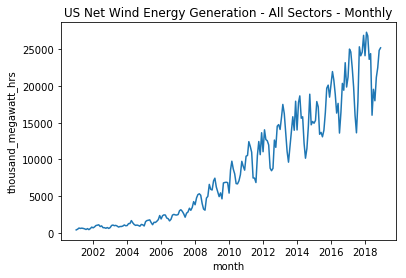

In [0]:
sns.lineplot(x='month', y='thousand_megawatt_hrs', data=us_net_wind_gen)
plt.title('US Net Wind Energy Generation - All Sectors - Monthly');

In [0]:
# Net wind generation for Texas, monthly
tx_net_wind_gen = pd.read_csv('./data/Net_generation_wind_Texas_all_sectors_monthly.csv', lineterminator=',')

# Same cleaning process as above
tx_net_wind_gen['thousand_megawatt_hrs'], tx_net_wind_gen['month'] = tx_net_wind_gen['Net generation wind Texas all sectors monthly\nhttps://www.eia.gov/opendata/qb.php?category=14&sdid=ELEC.GEN.WND-TX-99.M\n14:02:26 GMT-0400 (Eastern Daylight Time)\nSource: U.S. Energy Information Administration\nMonth'].str.split('\n', 1).str
tx_net_wind_gen = tx_net_wind_gen.drop(labels='Net generation wind Texas all sectors monthly\nhttps://www.eia.gov/opendata/qb.php?category=14&sdid=ELEC.GEN.WND-TX-99.M\n14:02:26 GMT-0400 (Eastern Daylight Time)\nSource: U.S. Energy Information Administration\nMonth', axis=1)
tx_net_wind_gen = tx_net_wind_gen.drop([0,217])
tx_net_wind_gen['thousand_megawatt_hrs'] = tx_net_wind_gen['thousand_megawatt_hrs'].astype('float')
tx_net_wind_gen['month'] = pd.to_datetime(tx_net_wind_gen['month'])

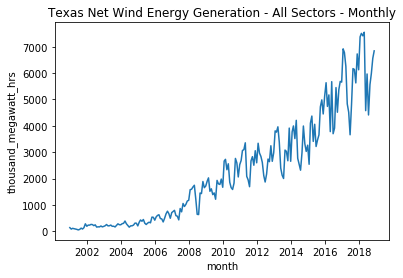

In [0]:
sns.lineplot(x='month', y='thousand_megawatt_hrs', data=tx_net_wind_gen)
plt.title('Texas Net Wind Energy Generation - All Sectors - Monthly');

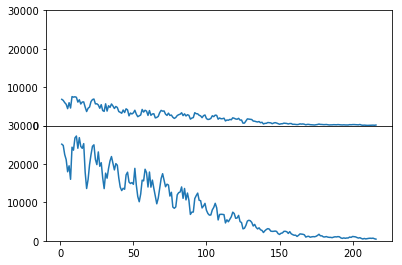

In [0]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(0, 30000))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(0, 30000))


ax1.plot(tx_net_wind_gen);
ax2.plot(us_net_wind_gen);

### Net generation of Natural Gas for All Sectors Jan. 2019

![Net generation: Natural gas: All Sectors: Jan 2019](./data/chart.png)

# Average Retail Price of Electricity (in US cents)

![Average Retail Electricity Price](./data/avg_retail_elec.png)

# Fossil Fuel Stock for Coal in January 2019

Texas has 6,730 tons of coal stock- the most in the US.

![Fossil Fuel Stocks for Coal in January 2019](./data/fossil_fuel_stock_coal_jan2019.png)

# Load GeoData

In [0]:
gdf = geopandas.read_file('./data/Project/tl_2018_us_state.shp')

In [0]:
gdf.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266474513,489028543,+38.6472854,-080.6183274,"POLYGON ((-81.747254 39.095379, -81.746354 39...."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138949136250,31361101223,+28.4574302,-082.4091477,"(POLYGON ((-86.38864599999999 30.994181, -86.3..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143780567633,6214824948,+40.1028754,-089.1526108,"POLYGON ((-91.185295 40.637803, -91.1751 40.64..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206228939448,18945217189,+46.3159573,-094.1996043,"POLYGON ((-96.784381 46.63050399999999, -96.78..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151100280,6979966958,+38.9466584,-076.6744939,"POLYGON ((-77.45880799999999 39.22027, -77.458..."


In [0]:
gdf.shape

(56, 15)

In [0]:
# Drop Hawaii, Virign Islands, Northern Mariana Islands, Guam, Alaska, American Samoa, and Puerto Rico
# I had to drop these regions/states so that geoplot would get the correct perspective of the US
# and not plot a very small US on an otherwise blank map, due to scaling.
gdf = gdf.drop(labels=[31, 34,35,36,40,41,49], axis='index')

gdf.REGION = gdf.REGION.astype(int)

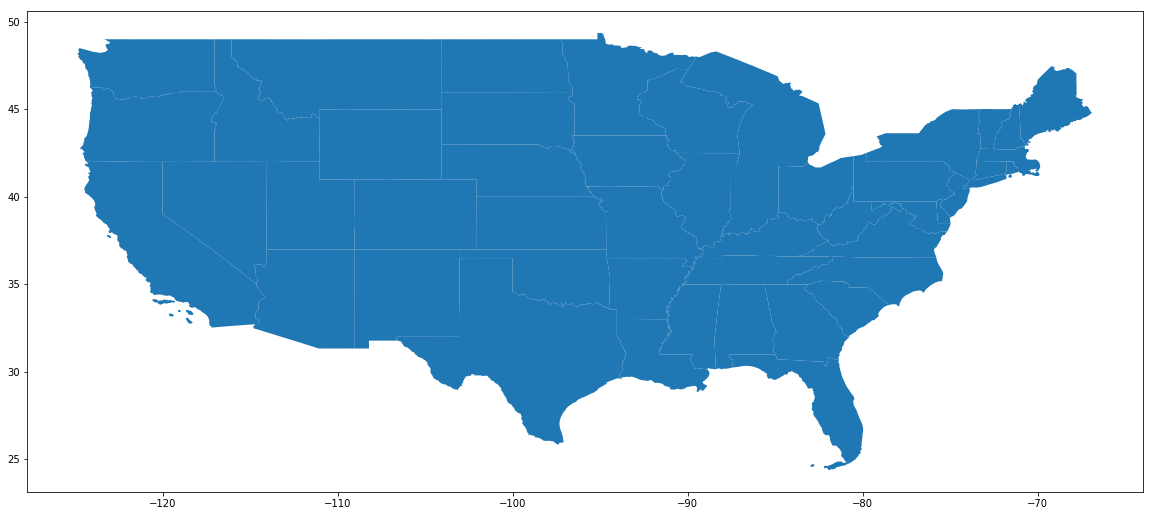

In [0]:
# geopandas plot test
gdf.plot(figsize=(20,10));

D:\Miniconda\envs\JupyterLab\lib\site-packages\mapclassify\classifiers.py:95: UserWarning: Warning: Not enough unique values in array to form k classes
  UserWarning)
D:\Miniconda\envs\JupyterLab\lib\site-packages\mapclassify\classifiers.py:96: UserWarning: Warning: setting k to 3
  Warn('Warning: setting k to %d' % k_q, UserWarning)


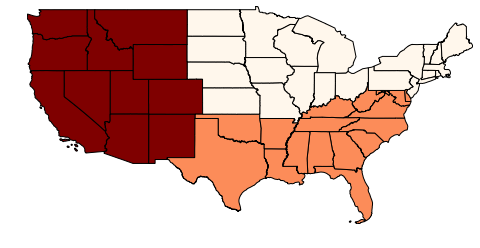

In [0]:
# geoplot choropleth test
geoplot.choropleth(gdf, hue='REGION', cmap='OrRd', figsize=(8,4));

In [0]:
# Read in coal consumption CSV and rename 
states_coal_cons = pd.read_csv('./data/Project/Total_coal_consumption_for_all_sectors_all_states_pipe_format.csv', lineterminator='|', skiprows=1)
states_coal_cons = states_coal_cons.rename(columns={'\n':'state'})
states_coal_cons.head()

,state,200101,200102,200103,200104,200105,200106,200107,200108,200109,...,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901
0,"\n""US-AK""",58.615,77.587,76.351,48.312,51.169,47.746,76.143,96.767,88.440,...,61.676,66.211,67.900,69.165,84.167,98.320,NaN,103.786,84.947,99.698
1,"\n""US-AL""",3075.601,2729.104,2731.773,2235.792,2843.328,3037.746,3429.376,3485.621,2998.429,...,1109.963,1243.009,1697.933,1787.260,1700.137,1368.263,1050.261,1033.120,1090.776,1563.917
2,"\n""US-AR""",1319.773,1015.515,887.987,983.179,1190.280,1447.546,1501.581,1444.670,1449.639,...,1031.805,1203.007,1678.598,1837.943,1834.797,1574.952,1444.354,1693.538,1755.028,1636.297
3,"\n""US-AZ""",1772.881,1503.991,1487.809,1791.998,1820.466,1755.309,1824.521,1825.286,1652.326,...,1030.822,1185.138,1393.862,1766.109,1692.831,1512.219,1302.453,1370.499,1492.853,1209.095
4,"\n""US-CA""",154.430,138.330,108.270,155.970,149.680,158.180,164.160,169.180,142.190,...,52.265,55.506,54.677,55.949,58.376,55.579,44.649,44.826,48.577,54.404


In [0]:
states_coal_cons['state'] = states_coal_cons['state'].str.strip('"US-\n')

In [0]:
# Must do geopandas merges with geoframe on left to retain geoframe type instead of dataframe type
gdf = gdf.merge(states_coal_cons['201810'], left_on='STUSPS', right_on=states_coal_cons['state'])
gdf = gdf.rename(columns={'201810':'coal_cons_201810'})

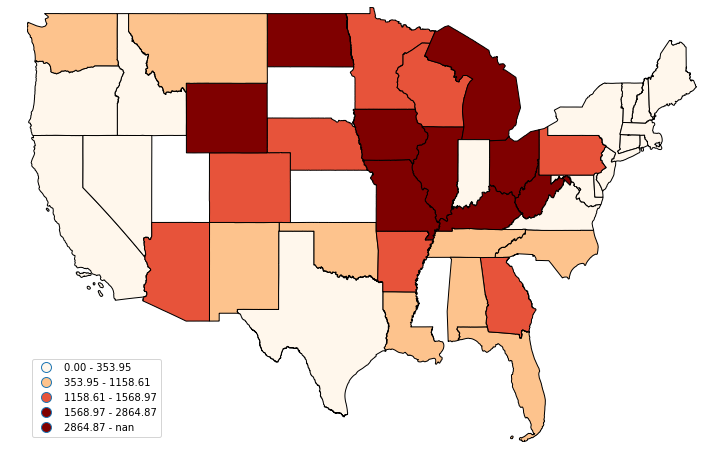

In [0]:
geoplot.choropleth(gdf, hue='coal_cons_201810', cmap='OrRd', figsize=(12,8), legend=True);

In [0]:
gdf[['STUSPS', 'coal_cons_201810']].sort_values('coal_cons_201810')

,STUSPS,coal_cons_201810
7,NH,0.16100
32,NY,1.27400
11,DE,1.63600
14,NJ,36.72000
13,CA,44.64900
16,OR,61.68400
33,NV,93.54400
40,VA,143.79800
4,MD,149.00900
26,OK,490.57600
